# TP3: Fonctions multi-dimensionnelles, optimisation, dichotomie

L'objectif de ce TP est d'appliquer ce que vous avez vu en cours sur les fonctions multi-dimensionnelles. En particulier, implémenter en python, les techniques d'optimisation et de recherche de solution à l'équation $f(\mathbf(x)=0)$.

Dans ce TP nous allons implémenter les méthodes vues en cours pour la recherche de minimum d'une fonction $h(x)$. Cette recherche de minimum peut aussi être vu comme la recherche des zéros de la dérivée, soit la résolution de l'équation $h'(x)=0$.

### Exercice 1: Matrices définies positives/négatives

Nous avons étudié au TD3, les matrices suivantes.
Créer deux fonctions Python, itératives et basées sur le calcul des mineurs, permettant de déterminer si une matrice est définie positive ou négative.
On ne cherchera pas le cas où une matrice est semie définie.

- $A=\begin{bmatrix}2 & -1\\ -1 & 1 \end{bmatrix}$
- $B=\begin{bmatrix}-2 & 2\\ 2 & -4 \end{bmatrix}$
- $C=\begin{bmatrix}2 & 2 & 1 \\ 2 & 3 & 0\\ 1 &0 &2 \end{bmatrix}$
- $D=\begin{bmatrix}1 & 1 &1 \\ 1 & 0 & 1\\ 1 & 1 &0 \end{bmatrix}$

Vous pourrez utiliser la librairie `numpy.linalg` afin de calculer le déterminant d'une matrice.

In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
A = np.array([[2, -1],[-1, 1]])
B = np.array([[-2, 2],[2, -4]])
C = np.array([[2, 2, 1],[2, 3,0],[1, 0, 2]])
D = np.array([[1, 1, 1],[1, 0, 1],[1, 1, 0]])

In [3]:
def matrice_positives(mat:np.array):
    taille=np.shape(mat)[0]
    D=[]
    # on définit la taille d'une ligne de la matrice en supposant qu'elle soit carré
    for ii in range(1, taille+1):
        D.append(la.det(mat[:taille-ii,:taille-ii]))
    for ii in range(taille):
        if(D[ii-1]<0):
            return "pas positif"
    return "positif"

matrice_positives(A) 

'positif'

In [4]:
def matrice_negatives(mat:np.array):
    taille=np.shape(mat)[0]
    D=[]
    # on définit la taille d'une ligne de la matrice en supposant qu'elle soit carré
    for ii in range(1, taille+1):
        D.append(la.det(mat[:taille-ii,:taille-ii]))
    for ii in range(1,taille+1):
        if(D[ii-1]<0 and ii%2==0):
            return "pas negatif"
        if(D[ii-1]>=0 and ii%2==1):
            return "pas negatif"
    return "negatif"

matrice_negatives(B)

'negatif'

### Exercice 2: Visualisation

Soit la fonction suivante $g(x,y) = \sin(y) + x^2$.

**Q1.** Tracer la surface de cette fonction en vous aidant du code Python vu en cours et rappelé ci-dessous.

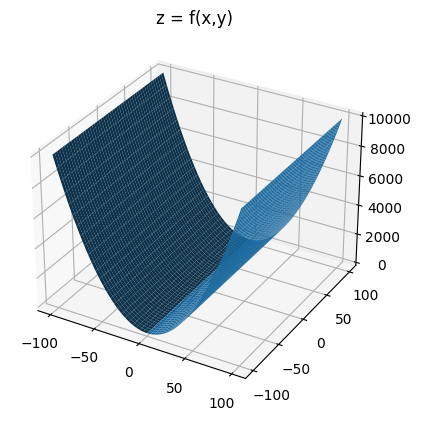

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x,y):
    return np.sin(y) + np.square(x)

debut = -100
fin   = 100
N     = 2000
x = np.linspace(debut, fin, N)
y = np.linspace(debut, fin, N)
x, y = np.meshgrid(x,y)
z = f(x,y)
fig = plt.figure()
#pour tracer la surface:
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(x, y, z)
axes.set_title('z = f(x,y)')
plt.show()

**Q2.** A l'aide des CPO et CSO, déterminer analytiquement les minima / maxima de la fonction $g$ si ils existent.

Confirmer les valeurs des optima obtenues précédemment en les visualisant sur la surface.

**CPO**

Grad f(x,y) = (df/dx(x,y), df/dy(x,y))
Grad f(x,y) = (2x, cos(y))
2x = 0 <=> x=0

cos(y) = 0 <=> y=(pi/2)+ k*pi où k appartient à l'ensemble Z 

**CSO**

          | df^2/dx^2  df/dxdy |      | 2      0   |  
H (x,y)=  | df/dxdy   df^2/dy^2|   =  | 0   -sin(y)|

                     | df^2/dx^2  df/dxdy |      | 2      0   |  
H (0,(pi/2)+ k*pi)=  | df/dxdy   df^2/dy^2|   =  | 0   (-1)^k |



D1 = 2 > 0

D2 = -2 < 0 si k est impair 
    H -> rien

D2 = 2 >  0 si k est pair
    H-> positif







**Q3.** Tracer des vues en coupes pertinentes afin de voir les optima en 2D.

**Q4.** Tracer des isoclines pertinentes de la fonction.

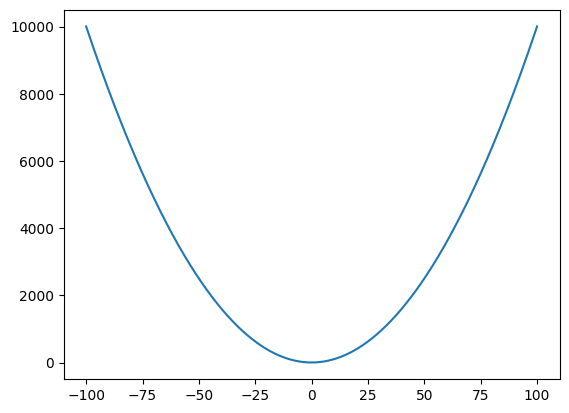

In [6]:
debut = -100
fin   = 100
N     = 2000
x = np.linspace(debut, fin, N)

z = f(x,np.pi/2)

plt.plot(x,z)
plt.show()

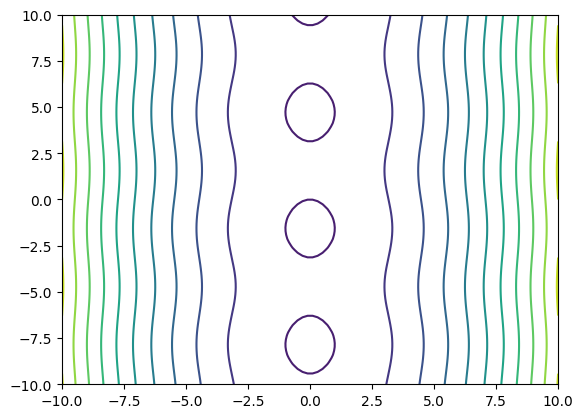

In [7]:
x = np.linspace(-10, 10, 100) 
y = np.linspace(-10, 10, 100) 
x, y = np.meshgrid(x,y)
z = f(x,y)
fig = plt.figure()
#axes = fig.add_subplot(projection='3d') 
#axes.contour(x,y, z, 10) 
plt.contour(x,y, z, 10) 
#axes.set_title('z = f(x,y)') 
plt.show()


### Exercice 3: Recherche de zéros - résolution de l'équation f(x)=0

Soit la fonction $f$ définie par: $f(x) = \ln x + x^2$

**Q1.** Analyser la fonction $f$
- [ ] donner son domaine de définition
- [ ] à partir du calcul de sa dérivée, étudier les variations de $f$ (croissante, décroissante)
- [ ] admet-elle un minima ?
- [ ] donner les limites de $f$ aux bornes de son domaine de définition.
- [ ] la fonction s'annule-t-elle sur cet intervalle ?
- [ ] déterminer $f(1)$, qu'en concluez-vous ?

$D_f = ]0; +\infty[$

$f'(x) = \dfrac{1+2x^2}{x} > 0$ donc f est strictement croissante

$\lim_{x\rightarrow 0} = -\infty$
$\lim_{x\rightarrow +\infty} = +\infty$
La fonction admet un minimum sur l'intervalle

**Q2.** Représenter la fonction $f$ sur son domaine de définition. On pourra utiliser `N=1000` points. Vous choisirez une borne maximum intéressante pour visualiser le point d'annulation.

**Attention** à vérifier que votre fonction logarithme est bien le logarithme népérien

In [8]:
eps = 1e-6
N = 1000
def f(x):
    return np.log(x) + x**2

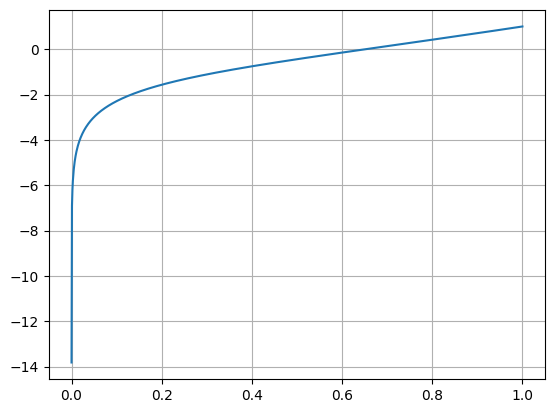

In [17]:
x = np.linspace(eps, 1,N) 
z = f(x)

plt.plot(x, z) 
plt.grid()
plt.show()

Nous avons vu en cours, que la dichotomie permettait de résoudre des équations du type $h(x)=0$ en encadrant la solution par deux valeurs $a$ et $b$ telles que $f(a) \cdot f(b) \leq 0$.

**Q3.** Proposer un programme qui prend en entrée deux réels $a< b$ et une fonction $f$ dont on cherche à déterminer la racine dans l'intervalle $[a,b]$ par dichotomie. Ce programme construit à chaque itération un nouvel intervalle $I_n$ dans lequel se trouve la solution, et une une suite $(x_n)$ qui converge vers la solution.
- [ ] penser à intialiser votre intervalle et votre suite
- [ ] tester deux approches, la première où l'intervalle $I_n$ est coupé en deux aléatoirement, la seconde où cet intervalle est coupé en sa moitié.
- [ ] ajouter une tolérance sur votre racine.
- [ ] _bonus_ ajouter un nombre d'itération maximum (pour éviter de tourner en rond...).


In [34]:
def trouve_racine(a,b,f):
    x = (a+b)/2
    
    if np.abs(f(a))<0.001:
        return a
    if np.abs(f(b))<0.001:
        return b
        
    if a == b:
        return f(a)
    if f(a) * f(x) <= 0:
        b = x
    else :
        a = x
    return trouve_racine(a,b,f)

trouve_racine(eps,1,f)

0.6528323784179688

**Q4.** Trouver une (ou plusieurs) solutions approchées de l'équation $f(x)=0$ en utilisant la méthode par dichotomie avec une précision de 0.001
- [ ] déterminer théoriquement le nombre d'itérations nécessaires pour obtenir cette précision. Vérifier cette valeur expérimentalement.

In [36]:
#nb d'itérations théorique

variable=0

In [43]:
def trouve_racine(a,b,f,variable):
    variable += 1
    x = (a+b)/2
    
    if np.abs(f(a))<0.001:
        return a, variable
    if np.abs(f(b))<0.001:
        return b, variable
    
    if f(a) * f(x) <= 0:
        b = x
    else :
        a = x
    return trouve_racine(a,b,f,variable)

trouve_racine(eps,1,f,0)

(0.6528323784179688, 12)

**Q5.** Créer maintenant un programme qui permet d'obtenir la racine grâce à la méthode de la sécante.
- [ ] comparer le nombre d'itérations prises avec cette méthode par rapport à la dichotomie.

**Q6.** Créer maintenant un programme qui permet d'obtenir la racine grâce à la méthode de Newton.
- [ ] comparer le nombre d'itérations prises avec cette méthode par rapport aux précédentes.